# Real Estate Investment Potential in King Country: Returns, Renovation, Neighbordhoods, and Timing

This notebook analyzes housing data from the King County dataset with the purpose of providing valuable insights to stakeholders. 
Our stakeholders is Charles Christensen, who is a seller with a keen interest in making high-return investments. 
Charles is also interested in whether the properties have been renovated, the significance of renovations, 
the best neighborhoods for investment, and timing considerations.

Here are the key factors in brief:

- Emphasis on high-return investments.
- Assessment of the impact of renovations.
- Evaluation of the impact of neighborhoods.
- Consideration of timing factors."

--------------------------------------------
**To be analyzed investment factors**

1. **Investment Focus**: 
    - Find properties where sold for higher price than bought, see what brought them to high returns, such as location, condition, and renovation 
2. **Renovation Impact**: 
    - Do renovated properties have higher selling prices? Investigate the differences in price for properties with and without renovations. Calculate return of investment. 
    - Analyze the relationship between year_renovated and price to see if recently renovated properties fetch higher prices.
3. **Best Neighborhoods for Investment**: 
    - Average selling prices by neighborhoods 
    - Trends in price across different areas to identify neighboorhoods with the highest growth
    - Have a look at the sqft_living /sqft_lot (future development potential, market trends)
4. **Timing**: 
    - Explore how property prices have varied over time 
    - Are there any specific months/seasons when properties tend to sell for higher prices?
5. **Property Features and their Values**:
    - How features like bedrooms, bathrooms, waterfront, and others correlate with the selling price
    - Which features are the most important

-----------------------------------------------
Color Code for the plots: #008080, teal

# Import

#### Import packages

In [1045]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import altair as alt


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Import Dataset into python dataframe

In [1046]:
# Load the dataset from eda.csv into the DataFrame'df_houses' 
df_houses = pd.read_csv('data/eda.csv')

# Explore the dataset

In [1047]:
# Retrieve the shape of the DataFrame, showing numbers and rows
df_houses.shape

(21597, 23)

In [1048]:
# Display the first 5 rows of the DataFrame for an initial overview
df_houses.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [1049]:
# Get a summary of the DataFrame, including the count of non-null values for each column
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [1050]:
# Create summarized descriptive statistics 
df_houses.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [1051]:
# Get the data types of each column
df_houses.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id.1               int64
dtype: object

In [1052]:
# Access the 'date' column 
df_houses['date']

0        2014-10-13
1        2014-12-09
2        2015-02-25
3        2014-12-09
4        2015-02-18
            ...    
21592    2014-05-21
21593    2015-02-23
21594    2014-06-23
21595    2015-01-16
21596    2014-10-15
Name: date, Length: 21597, dtype: object

In [1053]:
# Check for missing values in each column
df_houses.isna().any()

id               False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront        True
view              True
condition        False
grade            False
sqft_above       False
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
date             False
price            False
house_id         False
id.1             False
dtype: bool

In [1054]:
# Count the number of duplicated rows
df_houses.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [1055]:
# Count the number of duplicated entries in the 'id' column
# @Result: 177 - that means that 177 houses where sold more than > 1
df_houses.duplicated(['id']).value_counts()

False    21420
True       177
Name: count, dtype: int64

In [1056]:
# Display the unique values in the 'view' column 
# The 'view' column contains values like [0., nan, 3., 4., 2., 1.] indicating the property's view count.
# A 'nan' value implies no views and can be replaced with 0 for clarity.
df_houses['view'].unique()

# Display the unique values in the 'waterfront' column 
# Plan to convert NaN values to 0 and transform the column into a boolean type for clarity.
df_houses['waterfront'].unique()

array([nan,  0.,  1.])

# Data Cleaning

### Overview and assumptions
- sqft_living15: Represents the average interior living space square footage of the 15 closest neighbors. This metric provides insights into:
    - **Neighborhood Consistency**
    - **Property Valuation**
    - **Market Trends**
    - **Future Development Potential**
    - **Comparative Analysis**

- **Column Naming Issues**: Some column names could be more descriptive or intuitive.

- **Redundant Columns**: The house_id column is redundant with id and can be removed.

- **Missing Values**: Notable columns with missing data include 
    - waterfront, 
    - view, 
    - sqft_basement, 
    - and yr_renovated.

    
- **Data Type Adjustments**: The date column is currently an object and should be converted to a datetime type.

- **Which columns are not needed**: 
    - Probably
        - floors
        - sqft_above
        - sqft_basement


- **Renaming, and changing types** 
    - id: house_id 
    - bedrooms: num_bedrooms (type:int) 
    - bathroom: num_bathroom (format: 2 decimal places)
    - sqft_living: sqft_living 
    - sqft_lot: sqft_land
    _ floors: floors (format: 1 decimal place)
    - waterfront: waterfront (NaN to 0, convert to boolean)
    - view: view (NaN to 0, convert to int)
    - condition: condition
    - grad: grad (convert to int)
    - sqft_above: sqft_above  
    - sqft_basement: sqft_basement  (NaN to 0, type: float)
    - yr_built: year_built      
    - yr_renovated: year_renovated (NaN to 0, add a new column for renovated: yes/no)
    - zipcode: zip, 
    - lat: lat       
    - long: long            
    - sqft_living15: sqft_neighbor_avg_living
    - sqft_lot15: sqft_neighbor_avg_land  
    - date: selling_date  (convert to datetime)
    - price: selling_price  (format: 2 decimal places)
    - house_id (drop column)
    - id.1: selling_id  

### Drop the column house_id because it is duplicated (same like first column id)

In [1057]:
# Dropping the 'house_id' column due to duplication
df_houses.drop('house_id', axis=1, inplace=True)

### Change column names 

In [1058]:
# Renaming column names
df_houses.rename({'id':'house_id','bedrooms':'num_bedrooms', 'bathroom':'num_bathrooms','sqft_lot':'sqft_land', 
                               'yr_built':'year_built', 'yr_renovated':'year_renovated', 'zipcode':'zip', 'sqft_living15':'sqft_neighbor_avg_living',
                               'sqft_lot15':'sqft_neighbor_avg_land', 'date':'selling_date', 'price':'selling_price', 'id.1':'selling_id'},axis=1, inplace=True) 
df_houses.columns

Index(['house_id', 'num_bedrooms', 'bathrooms', 'sqft_living', 'sqft_land',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zip', 'lat', 'long',
       'sqft_neighbor_avg_living', 'sqft_neighbor_avg_land', 'selling_date',
       'selling_price', 'selling_id'],
      dtype='object')

### Convert NaN to 0

In [1059]:
# Convert NaN to 0 for columns: waterfront, view, sqft_basement
df_houses['waterfront'].fillna(0, inplace=True)
df_houses['view'].fillna(0, inplace=True)
df_houses['sqft_basement'].fillna(0, inplace=True)
df_houses['year_renovated'].fillna(0, inplace=True)


### Change column-types

In [1060]:
# Changing data types 
try:
    df_houses = df_houses.astype({
        'num_bedrooms': int, 
        'waterfront': 'boolean', 
        'view': int, 
        'grade': int, 
        'sqft_basement': float
    })
    data_types_changed = True
except Exception as e:
    error_message = str(e)
    data_types_changed = False

(data_types_changed, error_message if not data_types_changed else "Data types successfully changed")

(True, 'Data types successfully changed')

In [1061]:
df_houses.dtypes

house_id                      int64
num_bedrooms                  int64
bathrooms                   float64
sqft_living                 float64
sqft_land                   float64
floors                      float64
waterfront                  boolean
view                          int64
condition                     int64
grade                         int64
sqft_above                  float64
sqft_basement               float64
year_built                    int64
year_renovated              float64
zip                           int64
lat                         float64
long                        float64
sqft_neighbor_avg_living    float64
sqft_neighbor_avg_land      float64
selling_date                 object
selling_price               float64
selling_id                    int64
dtype: object

In [1062]:
df_houses.head()

,house_id,num_bedrooms,bathrooms,sqft_living,sqft_land,floors,waterfront,view,condition,grade,...,year_built,year_renovated,zip,lat,long,sqft_neighbor_avg_living,sqft_neighbor_avg_land,selling_date,selling_price,selling_id
0,7129300520,3,1.000,1180.000,5650.000,1.000,False,0,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,1
1,6414100192,3,2.250,2570.000,7242.000,2.000,False,0,3,7,...,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,2
2,5631500400,2,1.000,770.000,10000.000,1.000,False,0,3,6,...,1933,0.000,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,3
3,2487200875,4,3.000,1960.000,5000.000,1.000,False,0,5,7,...,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,4
4,1954400510,3,2.000,1680.000,8080.000,1.000,False,0,3,8,...,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,5


### Formatting float numbers to two decimal places

In [1063]:
# But don't change display format
df_houses['bathrooms'] = df_houses['bathrooms'].round(2)
df_houses['selling_price'] = df_houses['selling_price'].round(2)
df_houses['floors'] = df_houses['floors'].round(1)

### Convert datetime of column 'selling-date' 

In [1064]:
# Type of date entry
type(df_houses['selling_date'][0])

str

In [1065]:
# Change "selling_date" dtype to datetime with format %Y/%m/%d
df_houses['selling_date'] = pd.to_datetime(df_houses['selling_date'], format='%Y-%m-%d')

In [1066]:
# Check "selling_date" dtype
type(df_houses['selling_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [1067]:
# Check the result
df_houses.dtypes

house_id                             int64
num_bedrooms                         int64
bathrooms                          float64
sqft_living                        float64
sqft_land                          float64
floors                             float64
waterfront                         boolean
view                                 int64
condition                            int64
grade                                int64
sqft_above                         float64
sqft_basement                      float64
year_built                           int64
year_renovated                     float64
zip                                  int64
lat                                float64
long                               float64
sqft_neighbor_avg_living           float64
sqft_neighbor_avg_land             float64
selling_date                datetime64[ns]
selling_price                      float64
selling_id                           int64
dtype: object

### Adding a Column to indicate whether a property was renovated

In [1068]:
# Add a new column to flag properties that have undergone renovation. 
# This distinction is crucial for providing our customers with key information regarding property updates. Our customers focus is on this information.
# Creates a new column named 'is_renovated' and assigns True to it for rows where year_renovated is not equal to zero, and False for rows where year_renovated is equal to zero
df_houses['is_renovated'] = df_houses['year_renovated'] != 0

# Get the list of columns in the DataFrame - helper function
columns = list(df_houses.columns.values)

# Reorder the columns to place 'is_renovated' after 'year_renovated'
df_houses = df_houses.reindex(columns=['house_id',
 'num_bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_land',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'year_built',
 'year_renovated',
 'is_renovated',
 'zip',
 'lat',
 'long',
 'sqft_neighbor_avg_living',
 'sqft_neighbor_avg_land',
 'selling_date',
 'selling_price',
 'selling_id'])


In [1069]:
df_houses.columns

Index(['house_id', 'num_bedrooms', 'bathrooms', 'sqft_living', 'sqft_land',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'is_renovated', 'zip',
       'lat', 'long', 'sqft_neighbor_avg_living', 'sqft_neighbor_avg_land',
       'selling_date', 'selling_price', 'selling_id'],
      dtype='object')

# Analyze the dataset

### General plotting

In [1070]:
df_houses.columns

Index(['house_id', 'num_bedrooms', 'bathrooms', 'sqft_living', 'sqft_land',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'is_renovated', 'zip',
       'lat', 'long', 'sqft_neighbor_avg_living', 'sqft_neighbor_avg_land',
       'selling_date', 'selling_price', 'selling_id'],
      dtype='object')

### Location Overview

In [1071]:
# Display all locations with plotly
fig = px.scatter_mapbox(df_houses,  lat="lat", lon="long", hover_name="house_id", hover_data=["house_id","zip"], 
                        color_discrete_sequence=["blue"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Top 10 Zip Codes by Number of Houses

In [1072]:
# Count the number of houses for zip code 
df_houses_zip = df_houses['zip'].value_counts()

# Convert the series to a DataFrame for plotting
df_houses_zip = df_houses_zip.reset_index()
df_houses_zip.columns = ['zip', 'number_of_houses']
df_houses_zip = df_houses_zip.astype({'zip': str})


# Create a bar chart
fig_country = px.bar(df_houses_zip.head(10), # Limit to top 10 zips for clarity
                     x='zip',
                     y='number_of_houses',
                     title='Top 10 Zip Codes by Number of Houses',
                     labels={'number_of_houses':'Number of Houses', 'zip':'Zip Code'})

# Show the plot
fig_country.show()


### Distribution of house prices


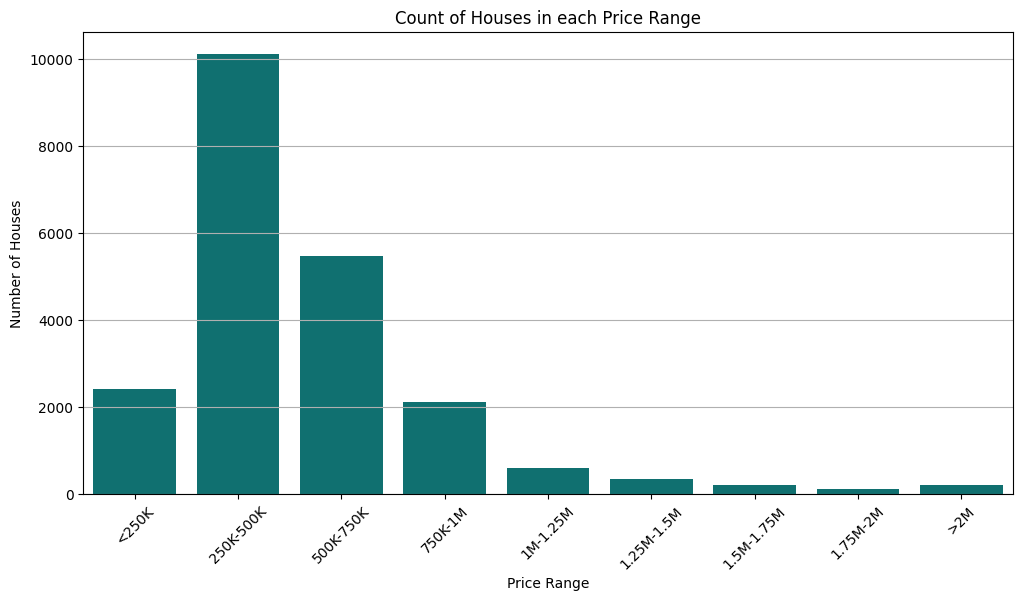

In [1073]:
# Bar plot using seaborn 
# Distribution of house prices

# Create a copy
df_houses_price_range = df_houses.copy()

# Define price bins 
bins = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, np.max(df_houses_price_range['selling_price'])]
labels = ['<250K', '250K-500K', '500K-750K', '750K-1M', '1M-1.25M', '1.25M-1.5M', '1.5M-1.75M', '1.75M-2M', '>2M']

# Categorize prices into bins
df_houses_price_range['PriceRange'] = pd.cut(df_houses_price_range['selling_price'], bins=bins, labels=labels, include_lowest=True)

# Count number of houses in each price range
price_range_count = df_houses_price_range['PriceRange'].value_counts().sort_index()


plt.figure(figsize=(12, 6))
sns.countplot(x='PriceRange', data=df_houses_price_range, color='teal')
plt.title('Count of Houses in each Price Range')
plt.xlabel('Price Range')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



### Create a dataframe with houses that where sold more than one time

In [1074]:
# Count the occurrences of each house_id
house_counts = df_houses['house_id'].value_counts()

# Filter out 
houses_sold_more_than_once_ids = house_counts[house_counts > 1].index

# Create new dataframe
houses_sold_more_than_once = df_houses[df_houses['house_id'].isin(houses_sold_more_than_once_ids)]

houses_sold_more_than_once.head(10)
#houses_sold_more_than_once.shape


,house_id,num_bedrooms,bathrooms,sqft_living,sqft_land,floors,waterfront,view,condition,grade,...,year_renovated,is_renovated,zip,lat,long,sqft_neighbor_avg_living,sqft_neighbor_avg_land,selling_date,selling_price,selling_id
93,6021501535,3,1.500,1580.000,5000.000,1.000,False,0,3,8,...,0.000,False,98117,47.687,-122.386,1570.000,4500.000,2014-07-25,430000.000,94
94,6021501535,3,1.500,1580.000,5000.000,1.000,False,0,3,8,...,0.000,False,98117,47.687,-122.386,1570.000,4500.000,2014-12-23,700000.000,95
313,4139480200,4,3.250,4290.000,12103.000,1.000,False,3,3,11,...,0.000,False,98006,47.550,-122.102,3860.000,11244.000,2014-06-18,1380000.000,314
314,4139480200,4,3.250,4290.000,12103.000,1.000,False,3,3,11,...,0.000,False,98006,47.550,-122.102,3860.000,11244.000,2014-12-09,1400000.000,315
324,7520000520,2,1.000,1240.000,12092.000,1.000,False,0,3,6,...,19840.000,True,98146,47.496,-122.352,1820.000,7460.000,2014-09-05,232000.000,325
325,7520000520,2,1.000,1240.000,12092.000,1.000,False,0,3,6,...,19840.000,True,98146,47.496,-122.352,1820.000,7460.000,2015-03-11,240500.000,326
345,3969300030,4,1.000,1000.000,7134.000,1.000,False,0,3,6,...,0.000,False,98178,47.490,-122.240,1020.000,7138.000,2014-07-23,165000.000,346
346,3969300030,4,1.000,1000.000,7134.000,1.000,False,0,3,6,...,0.000,False,98178,47.490,-122.240,1020.000,7138.000,2014-12-29,239900.000,347
371,2231500030,4,2.250,2180.000,10754.000,1.000,False,0,5,7,...,0.000,False,98133,47.771,-122.341,1810.000,6929.000,2014-10-01,315000.000,372
372,2231500030,4,2.250,2180.000,10754.000,1.000,False,0,5,7,...,0.000,False,98133,47.771,-122.341,1810.000,6929.000,2015-03-24,530000.000,373


### Create a dataframe with houses that where sold more than twice

In [1075]:
# Count the occurrences of each house_id
house_counts = df_houses['house_id'].value_counts()

# Filter out 
houses_sold_more_than_twice_ids = house_counts[house_counts > 2].index

# Create new dataframe
houses_sold_more_than_twice = df_houses[df_houses['house_id'].isin(houses_sold_more_than_twice_ids)]

houses_sold_more_than_twice.head(10)
#houses_sold_more_than_twice.shape


,house_id,num_bedrooms,bathrooms,sqft_living,sqft_land,floors,waterfront,view,condition,grade,...,year_renovated,is_renovated,zip,lat,long,sqft_neighbor_avg_living,sqft_neighbor_avg_land,selling_date,selling_price,selling_id
17588,795000620,3,1.000,1080.000,6250.000,1.000,False,0,2,5,...,0.000,False,98168,47.505,-122.330,1070.000,6250.000,2014-09-24,115000.000,17589
17589,795000620,3,1.000,1080.000,6250.000,1.000,False,0,2,5,...,0.000,False,98168,47.505,-122.330,1070.000,6250.000,2014-12-15,124000.000,17590
17590,795000620,3,1.000,1080.000,6250.000,1.000,False,0,2,5,...,0.000,False,98168,47.505,-122.330,1070.000,6250.000,2015-03-11,157000.000,17591


### Creating a plot to visualize only the price difference for houses sold exactly twice


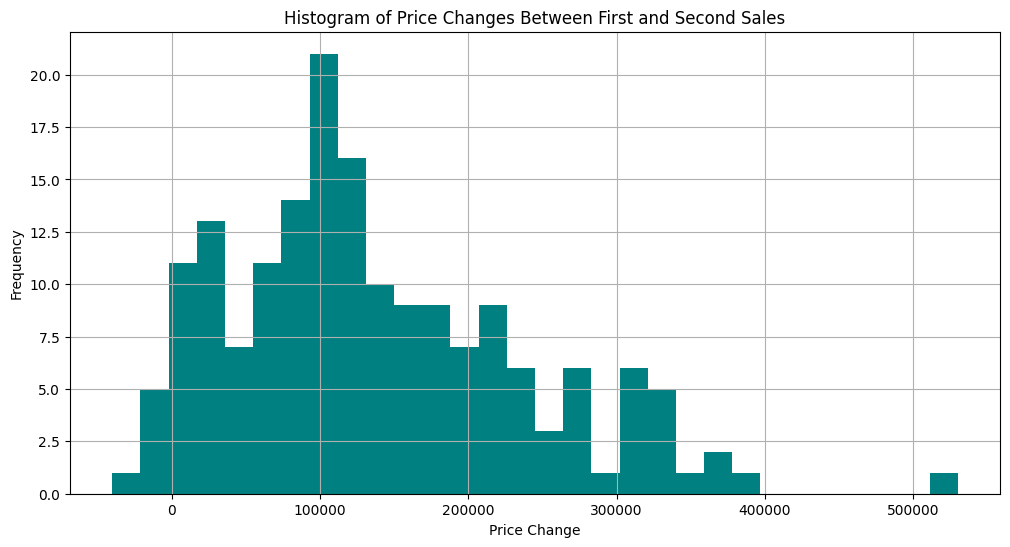

In [1076]:
# Filter houses sold exactly twice
df_houses_sold_twice = df_houses[df_houses['house_id'].isin(house_counts[house_counts == 2].index)]

# Sort by ID and then by date to ensure the order
df_houses_sold_twice = df_houses_sold_twice.sort_values(by=['house_id', 'selling_date'])

# Group by ID and take the first and last (which would be the second in this case) prices
price_difference = df_houses_sold_twice.groupby('house_id')['selling_price'].agg(['first', 'last'])

# Calculate the price difference
price_difference['price_change'] = price_difference['last'] - price_difference['first']

# Plot
plt.figure(figsize=(12, 6))
price_difference['price_change'].hist(bins=30, color='teal')
plt.title('Histogram of Price Changes Between First and Second Sales')
plt.xlabel('Price Change')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [1077]:
### 

In [1078]:
from vega_datasets import data

houses = df_houses
zip = alt.topo_feature(.us_10m.url, feature='zip')


# US states background
background = alt.Chart(zip).mark_geoshape(
    fill='lightgray',
    stroke='white'
).properties(
    width=500,
    height=300
).project('albersUsa')

# Airports grouped by state
points = alt.Chart(houses, title='Number of houses in King County').transform_aggregate(
    latitude='mean(lat)',
    longitude='mean(long)',
    count='count()',
    groupby=['state']
).mark_circle().encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    color=alt.Color('count:Q',scale=alt.Scale(scheme='teal'), legend=alt.Legend(title="Houses Count")),
    size=alt.Size('count:Q').title('Number of Houses'),
    tooltip=['state:N','count:Q'],
)


text = alt.Chart(airports, title='Number of houses in King County').transform_aggregate(
    latitude='mean(lat)',
    longitude='mean(long)',
    count='count()',
    groupby=['houses']
    ).mark_text(
    align='center',
    baseline='middle',
    dy=-13,  # Nudges text up so it doesn't appear on top of the bar
    #color="darkred"
).encode(
    longitude='longitude:Q',
    latitude='latitude:Q',
    text="count:Q",
)

background + points + text 

SyntaxError: invalid syntax (2016274190.py, line 4)

### **Investment Focus**: 
- Find properties where sold for higher price than bought, see what brought them to high returns, such as location, condition, and renovation 


- Median Price Increase: For houses sold at a higher price, the average increase was approximately $125,062.50.
- Median Price Decrease: For houses sold at a lower price, the average decrease was approximately $-10,000.00.


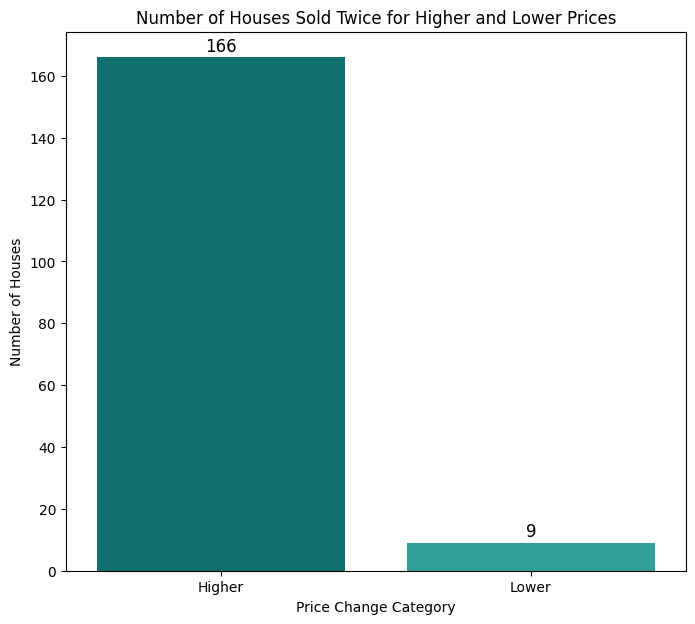

In [ ]:
# Analyzing and plotting the number of houses sold for a higher and lower price than they were bought
# and calculating the average price changes for both groups
# Only have a look on houses that are sold twice 

# Find houses sold twice
houses_sold_twice = df_houses['house_id'].value_counts()
houses_sold_twice = houses_sold_twice[houses_sold_twice == 2].index.tolist()

#Filter data
df_twice_sold = df_houses[df_houses['house_id'].isin(houses_sold_twice)]
df_twice_sold = df_twice_sold.sort_values(by=['house_id', 'selling_date', 'is_renovated'])

#Calculate price changes
df_twice_sold['price_change'] = df_twice_sold.groupby('house_id')['selling_price'].diff()
df_twice_sold = df_twice_sold.dropna(subset=['price_change'])

#Categorize price changes
df_twice_sold['price_change_category'] = df_twice_sold['price_change'].apply(lambda x: 'Higher' if x > 0 else 'Lower')

#Count the catagorizes
price_change_counts_twice_sold = df_twice_sold['price_change_category'].value_counts()

# Average price change
average_price_changes_twice_sold = df_twice_sold.groupby(df_twice_sold['price_change'] > 0)['price_change'].median()

# Correctly printing the average price increase and decrease statements
average_price_increase = average_price_changes_twice_sold[True]  # True for 'Higher'
average_price_decrease = average_price_changes_twice_sold[False]  # False for 'Lower'

print(f"- Median Price Increase: For houses sold at a higher price, the average increase was approximately ${average_price_increase:,.2f}.")
print(f"- Median Price Decrease: For houses sold at a lower price, the average decrease was approximately ${average_price_decrease:,.2f}.")


# Defining colors similar to teal
colors = ['teal', 'lightseagreen']

# Creating the updated bar plot for houses sold twice
plt.figure(figsize=(8,7))
bars = sns.barplot(x=price_change_counts_twice_sold.index, y=price_change_counts_twice_sold.values, palette=colors)

# Adding plot title and labels
plt.title('Number of Houses Sold Twice for Higher and Lower Prices')
plt.xlabel('Price Change Category')
plt.ylabel('Number of Houses')

# Adding the total number of sold houses on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')

# Showing the plot
plt.show()

Insights
- Number of Houses Sold for a Higher Price: 166 houses were sold for a price higher than their first selling price.
- Number of Houses Sold for a Lower Price: 9 houses were sold for a price lower than their first selling price.

- Median Price Increase: For houses sold at a higher price, the average increase was approximately $125.062,50.
- Median Price Decrease: For houses sold at a lower price, the average decrease was approximately $-10,000.00.

In [1104]:
# How many houses of houses sold twice where renovated
#df_twice_sold['is_renovated'].head()
df_twice_sold[df_twice_sold['is_renovated'] == True].shape

df_twice_sold[df_twice_sold['is_renovated'] == False].shape

(171, 29)

Only 4 of the 166 twice time sold houses where renovated. 

### **Renovation Impact**: 
- Do renovated properties have higher selling prices? Investigate the differences in price for properties with and without renovations. Calculate return of investment. 
- Analyze the relationship between year_renovated and price to see if recently renovated properties fetch higher prices.


In [ ]:
# Analyzing the impact of renovation on selling prices

# Grouping by the 'is_renovated' status and calculating average selling prices
average_prices_by_renovation_status = df_houses.groupby('is_renovated')['selling_price'].mean().round()

# Displaying the average prices for renovated and non-renovated properties
average_prices_by_renovation_status


is_renovated
False   532140.000
True    768902.000
Name: selling_price, dtype: float64

### Insights
Non-Renovated Properties: The average selling price is approximately $53.2140,32.
Renovated Properties: The average selling price is significantly higher at approximately $76.8902,89.
This initial comparison suggests that renovated properties tend to have higher selling prices compared to non-renovated properties.
(Optiona: check the correlation with grade and selling price - for future work)

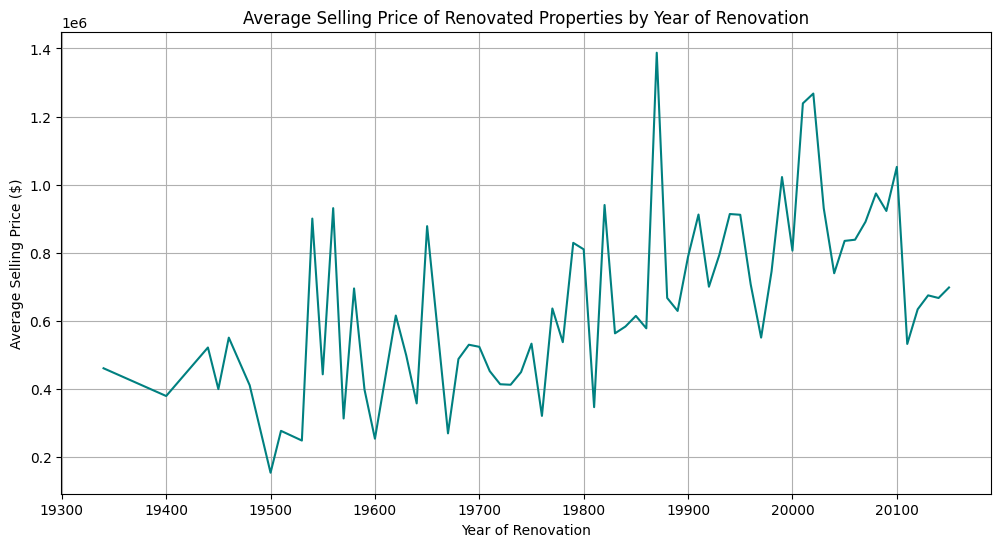

(532140.319858054, 44.492339953698874)

In [ ]:
# Analyzing the relationship between year of renovation and selling price
# Consider only properties that were renovated
renovated_properties = df_houses[df_houses['is_renovated']]

# Grouping by the year of renovation and calculating average selling prices
average_prices_by_renovation_year = renovated_properties.groupby('year_renovated')['selling_price'].mean()

# Filtering out properties where year_renovated is 0 
average_prices_by_renovation_year = average_prices_by_renovation_year[average_prices_by_renovation_year.index > 0]

# Sorting by year of renovation
average_prices_by_renovation_year = average_prices_by_renovation_year.sort_index()

# Plotting the relationship between year of renovation and average selling price
plt.figure(figsize=(12, 6))
average_prices_by_renovation_year.plot(kind='line', color='teal')
plt.title('Average Selling Price of Renovated Properties by Year of Renovation')
plt.xlabel('Year of Renovation')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.show()

# Calculating the return on investment
# For ROI calculation - compare average price of renovated properties with the overall average of non-renovated properties
average_non_renovated_price = df_houses[~df_houses['is_renovated']]['selling_price'].mean()
roi = ((average_prices_by_renovation_status[True] - average_non_renovated_price) / average_non_renovated_price) * 100

average_non_renovated_price, roi

### Insights - Return on Investment
The average selling price of non-renovated properties is approximately $532,140.32.
The calculated roi for renovated properties, compared to the average selling price of non-renovated properties, is approximately 44.49%. This indicates that on average, renovated properties sell for about 44.49% more than similar non-renovated properties.

### **Best Neighborhoods for Investment**: 
- Average selling prices by neighborhoods 
- Trends in price across different areas to identify neighboorhoods with the highest growth
- Might be important the sqft_living /sqft_lot (future development potential, market trends)


Text(200.8016817686222, 0.5, 'Latitude')

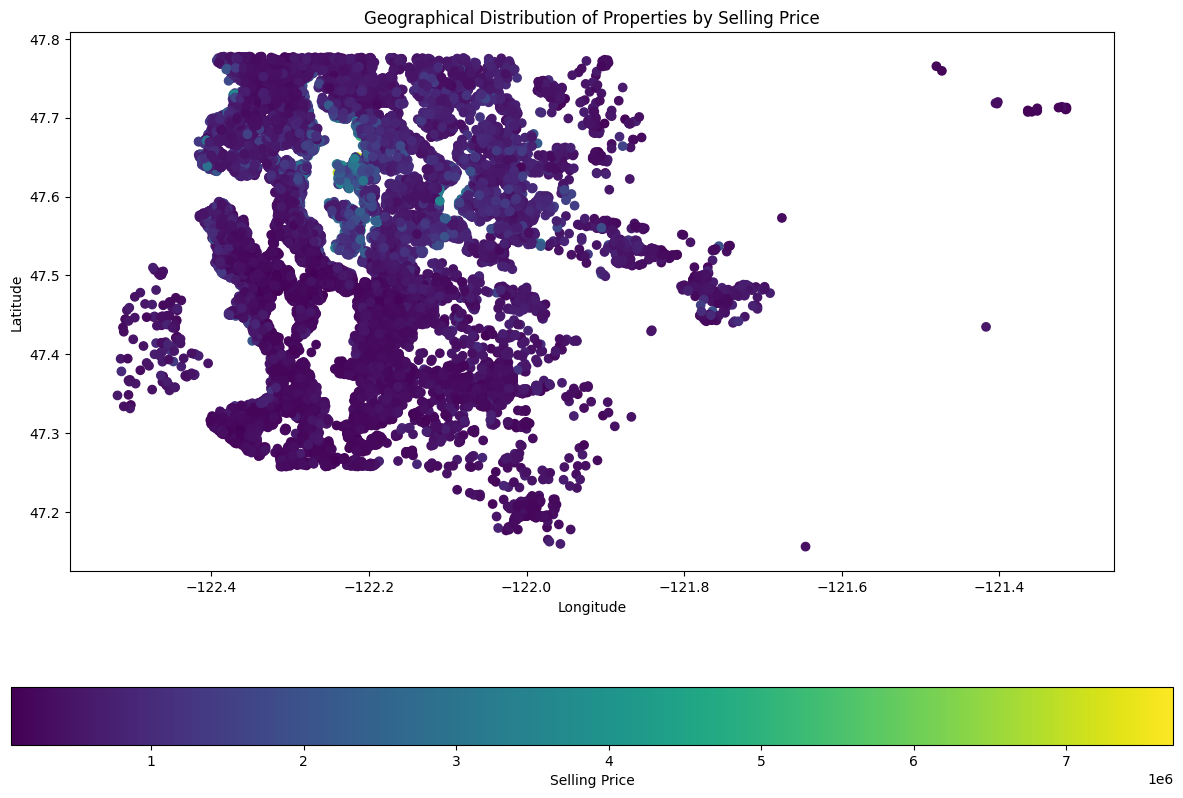

In [ ]:
import geopandas as gpd

# Creating a GeoDataFrame from the existing DataFrame
gdf = gpd.GeoDataFrame(
    df_houses, geometry=gpd.points_from_xy(df_houses.long, df_houses.lat))

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))

# Plotting the geographical plot with selling price as the color
gdf.plot(ax=ax, column='selling_price', cmap='viridis', legend=True, 
         legend_kwds={'label': "Selling Price", 'orientation': "horizontal"})

# Setting up plot title and labels
plt.title('Geographical Distribution of Properties by Selling Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

In [ ]:
df_houses.columns

Index(['house_id', 'num_bedrooms', 'bathrooms', 'sqft_living', 'sqft_land',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'is_renovated', 'zip',
       'lat', 'long', 'sqft_neighbor_avg_living', 'sqft_neighbor_avg_land',
       'selling_date', 'selling_price', 'selling_id', 'year', 'month',
       'year_only'],
      dtype='object')

### **Timing**: 
- Explore how property prices have varied over time 
- Are there any specific months/seasons when properties tend to sell for higher prices?


2014-05-02 00:00:00 2015-05-27 00:00:00


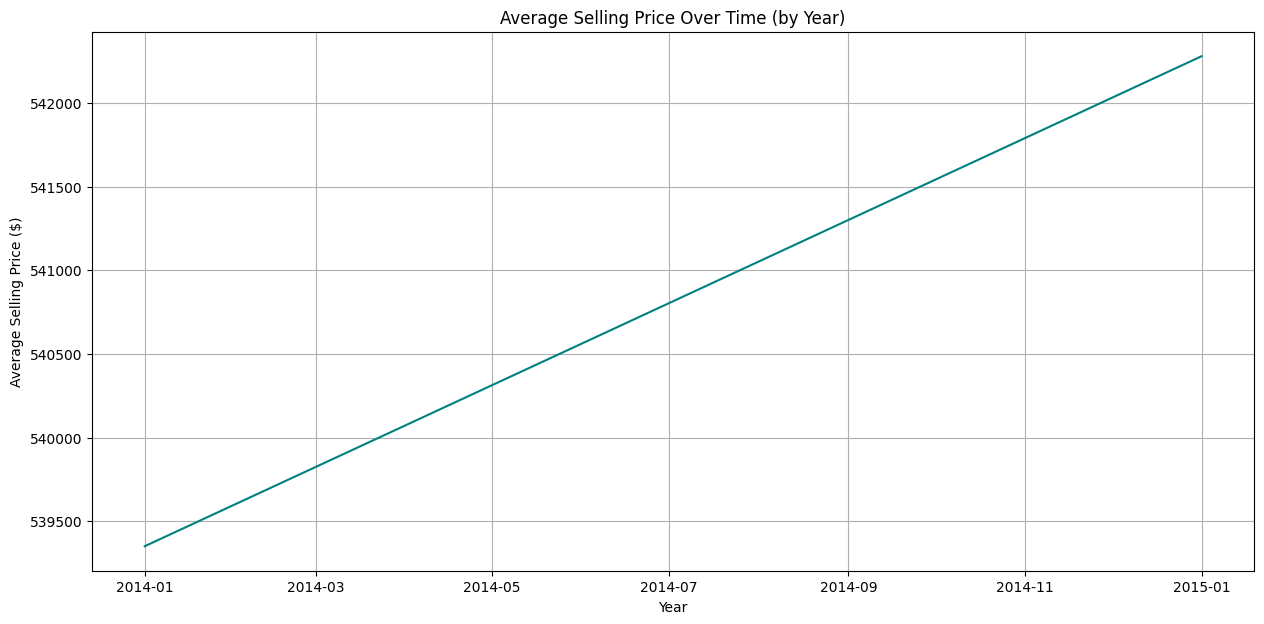

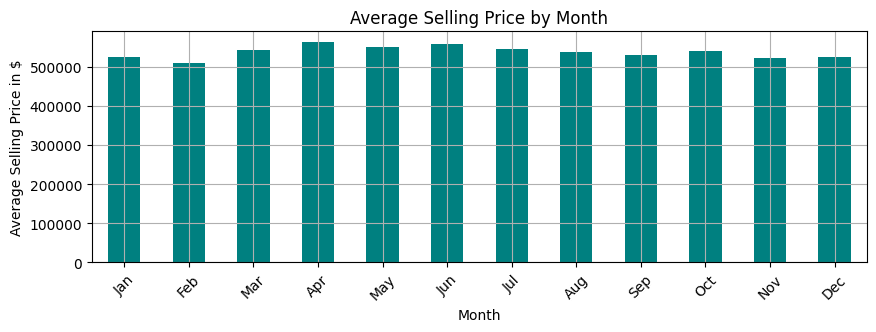

In [ ]:
# Find out range - to decided if plotting by months or years
# Finding the earliest and latest (most recent) dates in the dataframe
earliest_date = df_houses['selling_date'].min()
latest_date = df_houses['selling_date'].max()

print(earliest_date, latest_date)

# Extracting just the year for analysis
df_houses['year_only'] = df_houses['selling_date'].dt.to_period('Y')

# Analyzing overall price trend over time (by year only)
average_price_over_years = df_houses.groupby('year_only')['selling_price'].mean().reset_index()

# Converting the 'year_only' back to datetime for plotting
average_price_over_years['year_only'] = average_price_over_years['year_only'].dt.to_timestamp()


# Plotting the overall price trend over years
plt.figure(figsize=(15, 7))
sns.lineplot(x='year_only', y='selling_price', data=average_price_over_years, color='teal')
plt.title('Average Selling Price Over Time (by Year)')
plt.xlabel('Year')
plt.ylabel('Average Selling Price ($)')
plt.grid(True)
plt.show()

average_price_over_years

# Analyzing seasonal trends - grouping by month to see if certain months have higher prices
seasonal_trends = df_houses.groupby('month')['selling_price'].mean()

# Plotting seasonal trends
plt.figure(figsize=(10, 3))
seasonal_trends.plot(kind='bar', color='teal')
plt.title('Average Selling Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Selling Price in $')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.grid(True)
plt.show()

#average_price_over_time, seasonal_trends



In [ ]:
# Calculating the average selling price on the earliest and latest dates (first/last 20 entries)
print(df_houses[df_houses['selling_date'] == '2015-05-28']['selling_price'])
# only have one entry - so I need a range

df_houses_sorted_date = df_houses.sort_values('selling_date').reset_index()

# first or last sells
sold = 30

average_price_earliest = df_houses_sorted_date.head(sold)['selling_price'].mean()
average_price_latest = df_houses_sorted_date.tail(sold)['selling_price'].mean()

# Calculating the percentage change in average price from the earliest to the latest date
percentage_change = ((average_price_latest - average_price_earliest) / average_price_earliest) * 100

median_price_earliest = df_houses_sorted_date.head(sold)['selling_price'].median()
median_price_latest = df_houses_sorted_date.tail(sold)['selling_price'].median()

# Calculating the percentage change in average price from the earliest to the latest date
percentage_change_median = ((median_price_latest - median_price_earliest) / median_price_earliest) * 100

average_price_earliest, average_price_latest, percentage_change, median_price_earliest, median_price_latest, percentage_change_median


Series([], Name: selling_price, dtype: float64)


(470518.6666666667,
 586658.3,
 24.683321100969433,
 439975.0,
 451750.0,
 2.6762884254787203)

Average selling price on the earliest Date (starting May 2, 2014, first 30 sells): Approximately $470518.66.

Average selling price on the latest Date (ending May 27, 2015, last 30 sells): Approximately $ 586658.3.

The percentage change in the average selling price from the earliest date to the latest date in the dataset is approximately 24.68% -> increase in property prices over this period


Median selling price on the earliest Date (starting May 2, 2014, first 30 sells): Approximately $439975.00.

Median selling price on the latest Date (ending May 27, 2015, last 30 sells): Approximately $451750.0.

The percentage change in the average selling price from the earliest date to the latest date in the dataset is approximately 2.67% -> increase in property prices over this period

Optional: Quantiles Plot

### **Property Features and their Values**:
- How features like bedrooms, bathrooms, waterfront, and others correlate with the selling price
- Which features are the most important

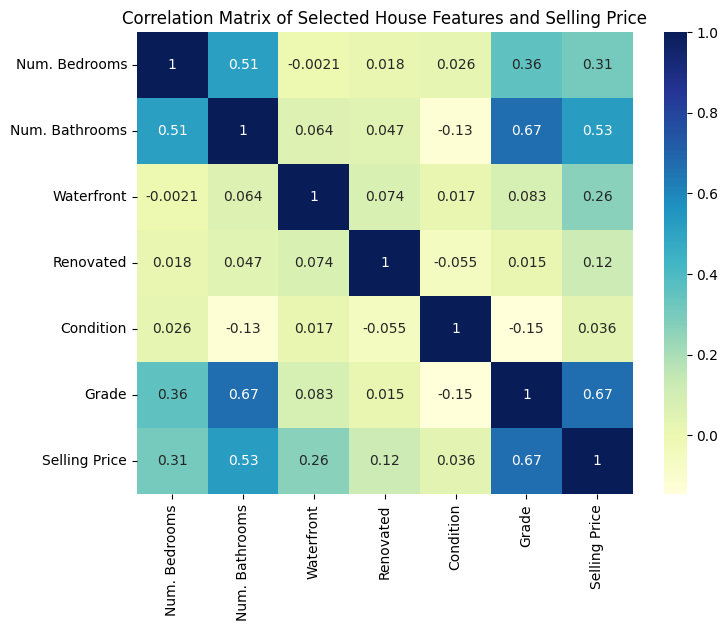

Selling Price    1.000
Grade            0.668
Num. Bathrooms   0.526
Num. Bedrooms    0.309
Waterfront       0.264
Renovated        0.118
Condition        0.036
Name: Selling Price, dtype: float64

In [ ]:
# Plotting a Heatmap, focus on the features, maybe include grade as well
# Adjusting the column names for correlation analysis
# Using the correct column names as per the dataframe
# Adjusting the correlation analysis to focus on specific columns: bedrooms, bathrooms, waterfront, and others
selected_features = ['num_bedrooms', 'bathrooms', 'waterfront', 'is_renovated', 'condition', 'grade', 'selling_price']

# Recalculating the correlation matrix for selected features
selected_correlation_matrix = df_houses[selected_features].corr()

# Creating a mapping of current column names to new names
column_name_mapping = {
    'num_bedrooms': 'Num. Bedrooms',
    'bathrooms': 'Num. Bathrooms',
    'waterfront': 'Waterfront',
    'condition': 'Condition',
    'is_renovated': 'Renovated',
    'grade': 'Grade',
    'selling_price': 'Selling Price'
}

# Renaming the columns in the correlation matrix for plotting
renamed_correlation_matrix = selected_correlation_matrix.rename(columns=column_name_mapping, index=column_name_mapping)

# Focusing on the correlation with the selling price
selected_correlation_with_price = renamed_correlation_matrix['Selling Price'].sort_values(ascending=False)

# Plotting the heatmap for the selected features
plt.figure(figsize=(8, 6))
sns.heatmap(renamed_correlation_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix of Selected House Features and Selling Price')
plt.show()

selected_correlation_with_price



### Insights
Positive Correlation: 'Num. Bedrooms' or 'Num. Bathrooms' have a strong positive correlation, it means that as the number of bedrooms or bathrooms increases, the selling price tends to be higher.

Negative Correlation: -

In General positive correlation